## Importing required libraries

In [211]:
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data into a data frame

In [212]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Dropping the features that do not affect the target variable (price)

In [213]:
df2 = df1.drop(['area_type', 'availability', 'society'], axis=1)
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Handling all the NaN values

In [214]:
df2.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [215]:
df2['balcony'] = df2['balcony'].fillna(0)
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [216]:
df2.shape

(13320, 6)

In [217]:
df3 = df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [218]:
df3.shape

(13246, 6)

In [219]:
df3.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Feature Engineering - Adding a new feature for BHK

In [220]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) # we split each input into tokens. the splitting is done with every space and stored in an array. we then take the first element in the array(the number is getting scored as the first element in the array)
df3.head()

<ipython-input-220-c88349664af4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) # we split each input into tokens. the splitting is done with every space and stored in an array. we then take the first element in the array(the number is getting scored as the first element in the array)


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


## Feature Engineering - Manipulating the 'total_sqft' column

In [221]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [222]:
def is_float(x): # this function returns True for an integer as it can be converted into a float and returns False for anything else (eg. '1133 - 1384', '4125Perch')
  try:
    float(x)
  except:
    return False
  return True

In [223]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,0.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


Above shows that total_sqft can be a range (e.g. 2100-2850). For such cases, we can just take the average of min and max value in the range.

There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion.

However, we just drop such corner cases to keep things simple.

In [224]:
def convert_sqft_to_num(x):
    tokens = x.split('-') # splits the range into 2 numbers and stores them in an array
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2 # returns the average of the range
    try:
        return float(x) # if the number is an integer only, it is simply returned as a float
    except:
        return None # in case of string, it cannot be converted into float, therefore returns nothing (eg. 34.46Sq. Meter)

In [225]:
df3.shape

(13246, 7)

In [226]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [227]:
df4.shape

(13246, 7)

## Feature Engineering - Adding a new feature called price per sqft

In [228]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


## Dimensionality reduction

In [229]:
df5.location = df5.location.apply(lambda x: x.strip()) # removes any unneccesary spaces
loc_stats = df5['location'].value_counts(ascending=False)
loc_stats

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

Any location that has less than 10 data points will be tagged as 'other'. This way the number of categories can be reduced by a great amount.

In [230]:
len(loc_stats)

1293

In [231]:
loc_stats_less_than_10 = loc_stats[loc_stats<=10]

In [232]:
len(loc_stats_less_than_10)

1052

In [233]:
df5.location = df5.location.apply(lambda x: 'Other' if x in loc_stats_less_than_10 else x)
df5.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,0.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,0.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,Other,6 Bedroom,1020.0,6.0,0.0,370.00,6,36274.509804


## Removing outliers using Business logic. (sq ft./bedroom)

We will consider that, square feet per bedroom is around 300.

In [234]:
df5.shape

(13246, 8)

In [235]:
df6 = df5[df5.total_sqft/df5.bhk>=300]
df6.shape

(12456, 8)

## Removing outliers using Standard Deviation and Mean (price/sq ft. location wise)

In [236]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

We can see above that the min value is 267 and the max value is 176470. This is a huge variance.

This variation could be true, depending on the area of the house.

Therefore we remove outliers per location seperately using mean and one standard deviation.

In [237]:
df6.shape

(12456, 8)

In [238]:
def remove_pps_outlier(df):
  df_out = pd.DataFrame() # we create a new empty data frame
  for key, subdf in df.groupby('location'): # df.groupby('location') returns a dictionary. We create sub dfs to remove outliers indiviually
    m = subdf.price_per_sqft.mean()
    s = subdf.price_per_sqft.std()
    reduced_df = subdf[(subdf.price_per_sqft>=(m-s)) & (subdf.price_per_sqft<=(m+s))]
    df_out = pd.concat([df_out, reduced_df], ignore_index=True)
  return df_out

df7 = remove_pps_outlier(df6)
df7.shape

(10291, 8)

## Removing outliers with the help of Scatter plots (for a given location how does the 2 BHK and 3 BHK property prices look like)

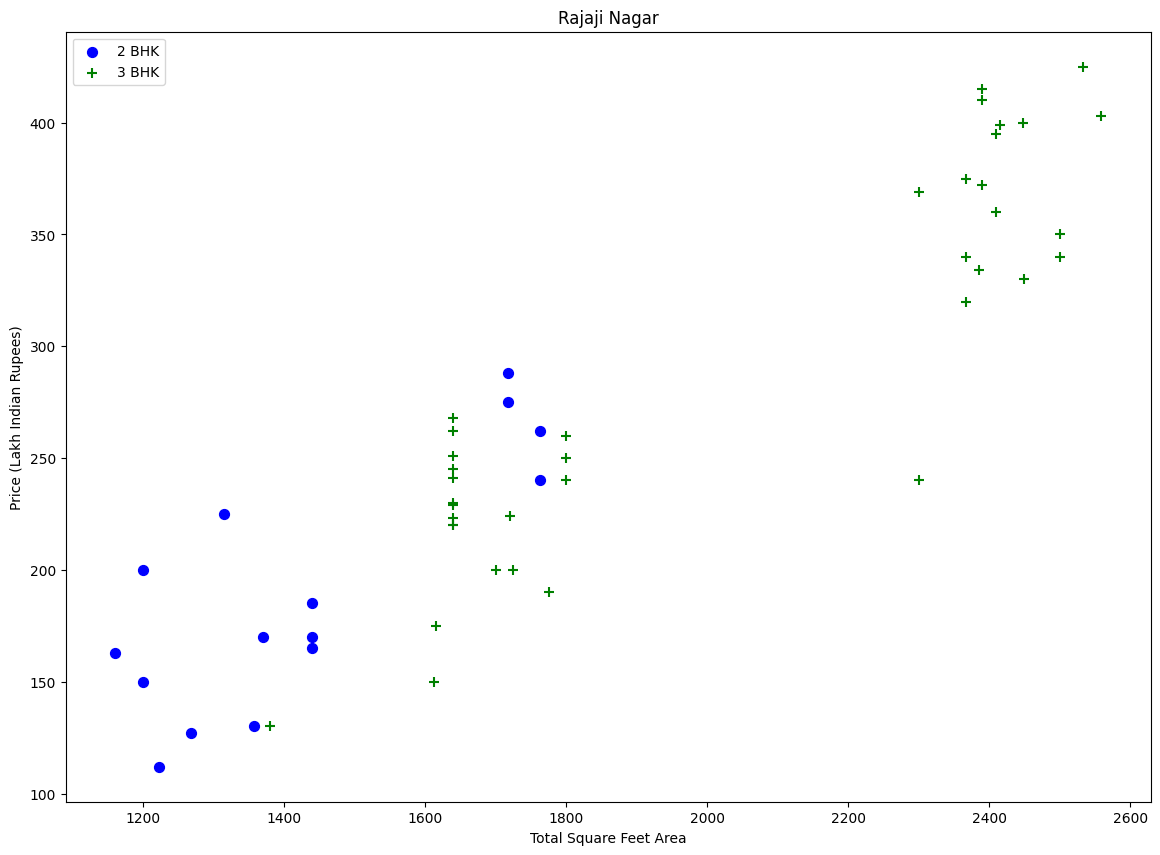

In [239]:
def plot_scatter_chart(df, loc):
  bhk2 = df[(df.location==loc) & (df.bhk==2)] # 2bhk houses in a specific location
  bhk3 = df[(df.location==loc) & (df.bhk==3)]
  plt.figure(figsize=(14,10))
  plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50) # plotting sq ft v/s price for 2 bhk houses in a specific location
  plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price (Lakh Indian Rupees)")
  plt.title(loc)
  plt.legend()

plot_scatter_chart(df7, "Rajaji Nagar")

As we can see above, for the same square feet and the same location, the price for 2 BHK is more than 3 BHK. Therefore, we need to remove such outliers.

In [240]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for loc, loc_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in loc_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in loc_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7376, 8)

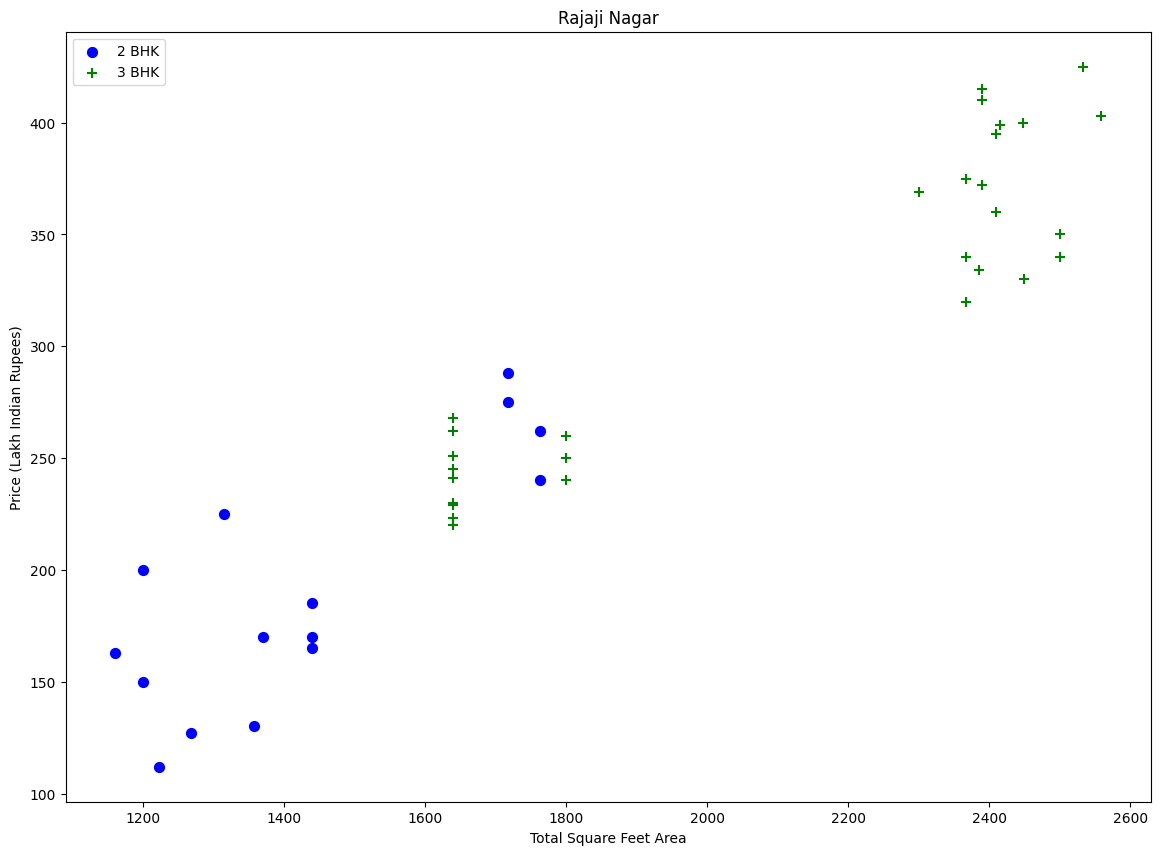

In [241]:
plot_scatter_chart(df8, "Rajaji Nagar")

## Removing outliers with the help of Histograms (Bathroom)

In [242]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

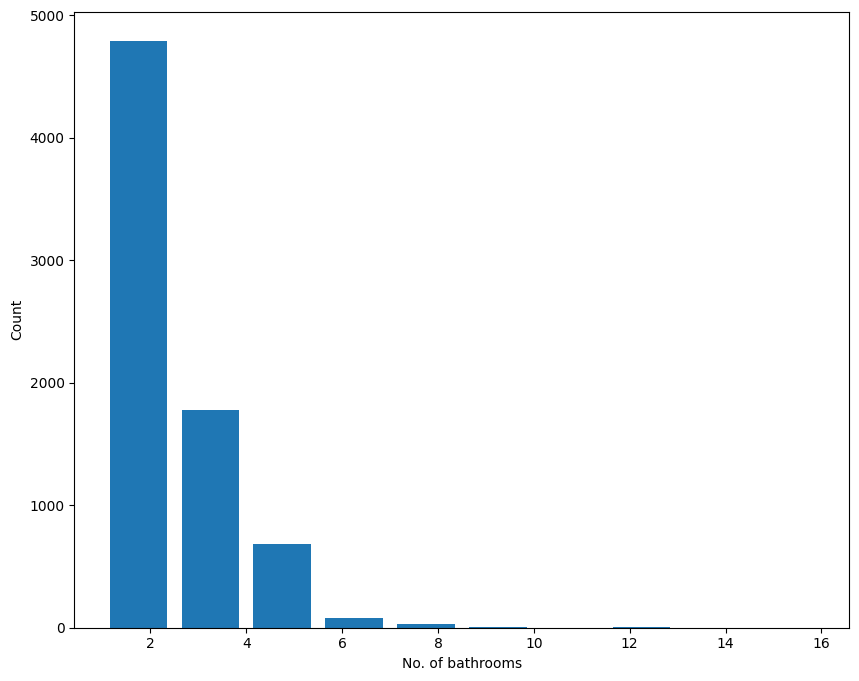

In [243]:
plt.figure(figsize=(10,8))
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("No. of bathrooms")
plt.ylabel("Count")

It is generally unusual to have 2 more bathrooms than the no. of rooms in a house

In [244]:
df8.shape

(7376, 8)

In [245]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7297, 8)

## Removing outliers with the help of Histogram (Balcony)

Text(0, 0.5, 'Count')

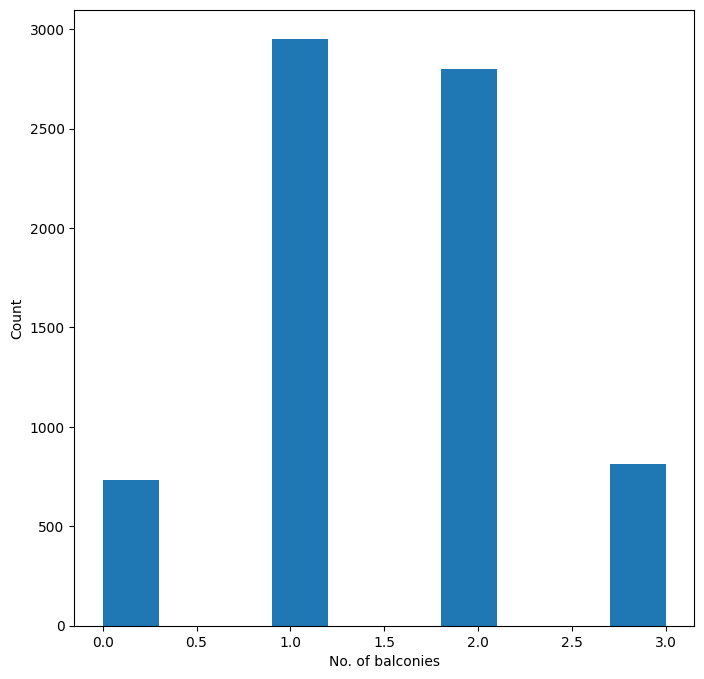

In [246]:
plt.figure(figsize=(8,8))
plt.hist(df9.balcony)
plt.xlabel("No. of balconies")
plt.ylabel("Count")

In [247]:
df9.shape

(7297, 8)

In [248]:
df10 = df9[df9.balcony<=df9.bhk]
df9.shape

(7297, 8)

In [249]:
df11 = df10.drop(['size', 'price_per_sqft'], axis=1)
df11.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [250]:
dummies = pd.get_dummies(df10.location)
df11 = pd.concat([df10, dummies], axis=1)
df12 = df11.drop(['location', 'Other', 'size', 'price_per_sqft'], axis=1)
df12.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
X = df12.drop(['price'], axis=1)
y = df12.price

In [252]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Finding the best model using GridSearchCV

In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

def best_model(X, y):
    algos = {

        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },

        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },

        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1,2],
                'solver': ['svd', 'lsqr']
            }
        },

        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }

    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model','best_score','best_params']).sort_values(by='best_score', ascending=False)

best_model(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.849032,{}
2,ridge,0.846535,"{'alpha': 1, 'solver': 'svd'}"
1,lasso,0.689259,"{'alpha': 1, 'selection': 'random'}"
3,decision_tree,0.675538,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


It is clearly visible above that the best model to train our dataset is LinearRegression. Therefore, we will use that.

In [254]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [255]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [256]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

6

In [257]:
def predict_price(loc, sqft, bath, balcony, bhk):
    loc_index = np.where(X.columns==loc)[0][0] # tells us the index of the specified 'location' we give as an input

    x = np.zeros(len(X.columns)) # creates an array with all elements as 0 (total length of array is the number of columns present in the Data Frame)
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    x[loc_index] = 1 # changes the array value to 1 for the specified 'location' index

    return lr.predict([x])[0]

In [258]:
predict_price('1st Phase JP Nagar',1000, 2, 0, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.12635680348036

In [259]:
predict_price('1st Phase JP Nagar',1000, 3, 1, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.38283434803256

In [260]:
predict_price('Indira Nagar',1000, 2, 0, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


183.24646568333208